In [77]:
import csv
import numpy as np
from math import *

obs = [] #array to store observed temperatures
labels = [] #array to store true class labels
R = 0 #Observation noise variance

#Retrive temperatures and true class labels from csv file
with open('pour_martin_ix70_iy115_iz26.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    k = 0
    for row in spamreader:
        if k == 0:
            k = 1 #first line is titles, we skip it
        else:
            arr = row[0].split('\t')
            obs.append(float(arr[1]))
            labels.append(int(arr[2]))

n = len(obs) #number of observations
obs = np.array(obs)
labels = np.array(labels)
classes = np.zeros((n,1)) #Array to store estimated class labels

#Class means and variances
gaus_mean = np.array([4.70226841574216, 7.70938140771444, 15.4116575244064, 18.5364702094555])
gaus_var = np.array([0.164338465357345, 1.27622462394194, 2.02625911575517, 0.232444749797503])**2



In [78]:
#Return denstity value of an observation "y" for a specific class "label"
def w(y, label):
    return 1/sqrt(gaus_var[label] + R)*exp(-(y - gaus_mean[label])**2/(2*(gaus_var[label] + R)))

#Update weight of a specific class according to new observation and previous class weights
def update_pi(y, label):
    return w(y, label)*pis[label]/np.sum([pis[k]*w(y, k) for k in range(4)])

#Compute error rate
def error_rate(trues, ests):
    error = 0
    for t in range(n):
        if ests[t] != trues[t]:
            error += 1
    return error/len(trues)

### 1re approche : Classifier en utilisant uniquement l'observation courante


Populating the interactive namespace from numpy and matplotlib
Error rate : 0.09278350515463918


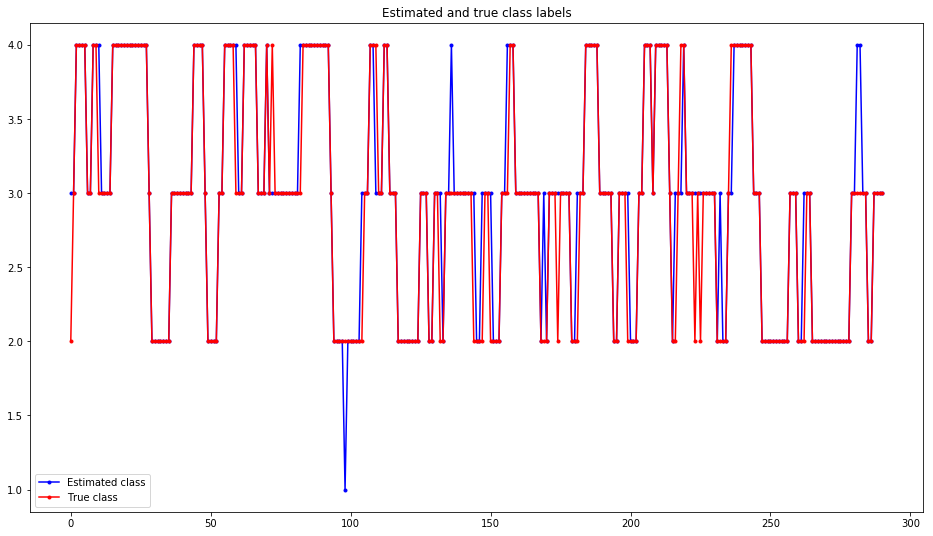

In [79]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 9.0)

import warnings
warnings.filterwarnings('ignore')

for t in range(n):
    pis = np.array([w(obs[t], k) for k in range(4)])
    classes[t] = np.argmax(pis) + 1

    
plot(range(n),classes, '.-b', label='Estimated class')
plot(range(n),labels, '.-r', label='True class')
legend()
title('Estimated and true class labels')

error = error_rate(labels, classes)
print("Error rate : " + str(error))

### 2ème approche : Classifier en utilisant la distribution des classes précédemment calculée

Populating the interactive namespace from numpy and matplotlib
Error rate : 0.5738831615120275


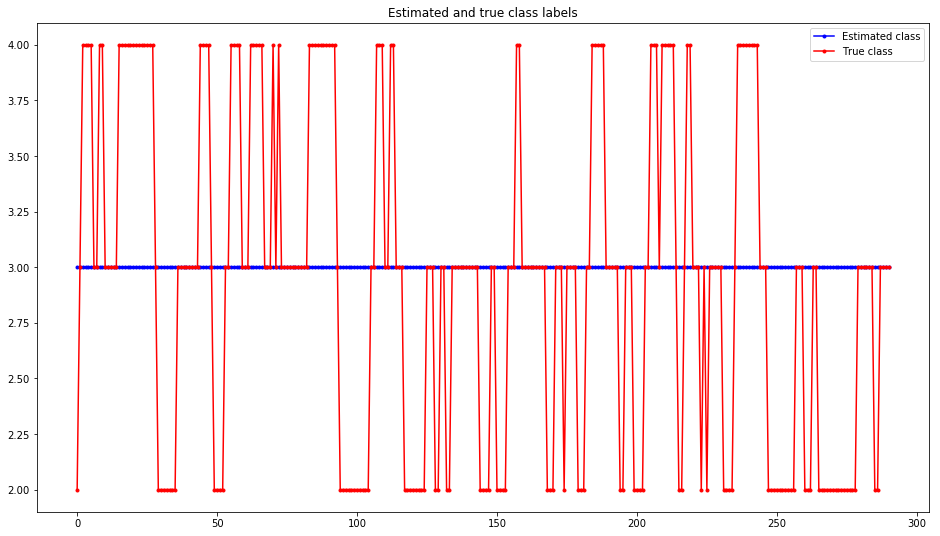

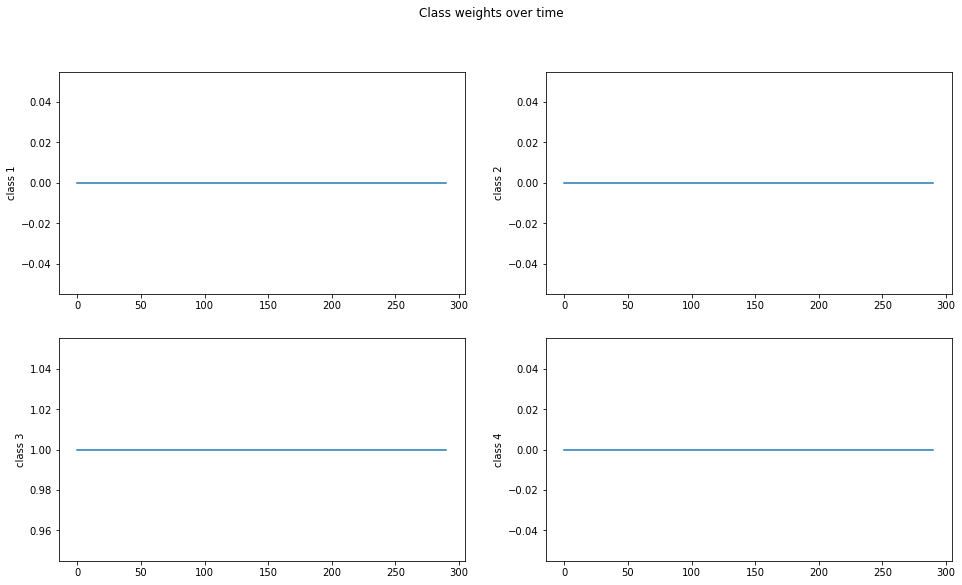

In [82]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 9.0)

all_pis = np.zeros((n, 4))

for t in range(n):
    
    pis = np.array([update_pi(obs[t], k) for k in range(4)])
    all_pis[t,:] = pis
    classes[t] = np.argmax(pis) + 1
    
error = error_rate(labels, classes)
print("Error rate : " + str(error))
    
figure(1)    
plot(range(n), classes, '.-b', label='Estimated class')
plot(range(n), labels, '.-r', label='True class')
legend()
title('Estimated and true class labels')

figure(2)
y_label=('class 1','class 2','class 3','class 4')
suptitle('Class weights over time')
for k in range(4):
    subplot(2,2,k+1)
    plot(range(n), all_pis[:,k])
    ylabel(y_label[k])